In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
m = 2
delta = 0.00001
q = np.ones(m)/m#*(delta)/(m-1)
# q[0] = 1 - delta

q.sum()

1.0

In [10]:
q = np.random.uniform(0, 1, m)
q = q/q.sum()

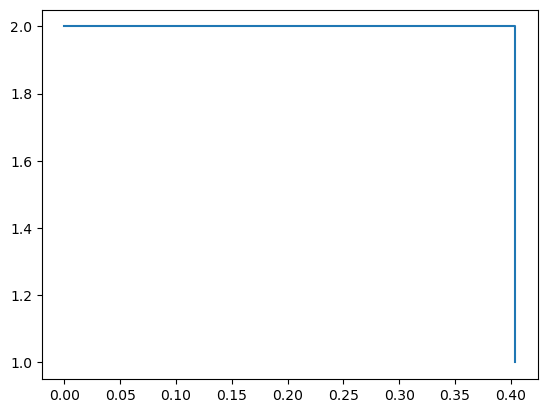

In [25]:
def Gamma_q(q, epsilon):
    q_inner = q.copy()
    q_inner.sort()
    Gamma = []
    for q_i in q_inner[::-1]:
        Gamma.append(q_i)
        if sum(Gamma) >= 1 - epsilon:
            break
    return np.array(Gamma)

func = lambda epsilon: Gamma_q(q, epsilon).size

func2 = lambda epsilon: Gamma_q(q, epsilon).sum()

q = np.sort(q)[::-1]

Epsilon = 1-q.cumsum()
plt.step(
    Epsilon,
    [func(e) for e in Epsilon]
)
# plt.step(
#     Epsilon,
#     [func2(e) for e in Epsilon]
# )

In [20]:
q

array([0.59597216, 0.40402784])

In [35]:
Gamma_q(q, q[0])

array([0.59597216])

In [6]:
Gamma_q(q, 0.999)

array([0.25160521])

In [7]:
Gamma_q(q, 1 - q[:1].sum()).size

2

In [8]:
for k in range(1, m):

    assert k <= m
    assert k > 0

    epsilon = 1 - q[:k].sum()
    assert Gamma_q(q, epsilon).size == k

    assert Gamma_q(q, epsilon).sum() == q[:k].sum()

AssertionError: 

# Notes

## $\Gamma$ as the complement

Properness condition implies

$$\lambda(\varepsilon)(\mathbb{P}(\Gamma) - \mathbb{P}(\Gamma^{\varepsilon}_q)) \leq g(|\Gamma|) - g(|\Gamma^{\varepsilon}_q|).$$

If $\Gamma = \boldsymbol{Y}\backslash\Gamma^{\varepsilon}_q$, then of course $\mathbb{P}(\Gamma) = 1 - \mathbb{P}(\Gamma^{\varepsilon}_q)$, which implies

$\lambda(\varepsilon)(1 - 2\mathbb{P}(\Gamma^{\varepsilon}_q)) \leq g(m-|\Gamma^{\varepsilon}_q|) - g(|\Gamma^{\varepsilon}_q|)$.

We know that if $\varepsilon = 1 - \sum_{i=1}^kq_{(i)}$, then $|\Gamma^{\varepsilon}_q|=k$, and $\mathbb{P}(\Gamma^{\varepsilon}_q) = \sum_{i=1}^kq_{(i)}$. Thus, we must have

$\lambda\bigg(1 - \sum_{i=1}^kq_{(i)}\bigg)\bigg(1 - 2\sum_{i=1}^kq_{(i)}\bigg) \leq g(m-k) - g(k)$.

By monotonicity of $g$, $m-k < k \iff k > m/2 \implies g(m-k) < g(k)$.

Thus, setting $k = \lceil\frac{m}{2}\rceil + 1$, we have that the right hand side of the inequality is negative. And since $\lambda>0$, this says that we must have


$1 \leq 2\sum_{i=1}^kq_{(i)} \iff \sum_{i=1}^kq_{(i)} \geq \frac{1}{2} \iff \mathbb{P}(\Gamma^{\varepsilon}_q) \geq \frac{1}{2}$.

But this is allways true, since $k > m/2$. By definition, we include at least $\varepsilon = 1 - \sum_{i=1}^kq_{(i)}$ "probability mass" in $(\Gamma^{\varepsilon}_q)$, and for $k >m/2$, this is at least half of the probability.

Thus, for $\Gamma$ being the complement of the optimal prediction, we find no contradiction. If there exist functions $\lambda$ and $g$ such that the condition holds, remains to be seen, but they have to satisfy

$$\lambda\bigg(1 - \sum_{i=1}^kq_{(i)}\bigg)\bigg(1 - 2\sum_{i=1}^kq_{(i)}\bigg) \leq g(m-k) - g(k)$$
for all $q$ and $1 \leq k \leq m$.

## $\Gamma = \emptyset$
Then $-\lambda(\varepsilon)\mathbb{P}(\Gamma^{\varepsilon}_q) \leq g(0) - g(|\Gamma^{\varepsilon}_q|) \iff g(|\Gamma^{\varepsilon}_q|) - g(0) \geq \lambda(\varepsilon)\mathbb{P}(\Gamma^{\varepsilon}_q) = \lambda\bigg(1-\sum_{i=1}^kq_{(i)}\bigg)\sum_{i=1}^kq_{(i)}$. There is no obvious contradiction here. However, $\lambda$ and $g$ must satisfy

$$g(k) - g(0) \geq \lambda\bigg(1-\sum_{i=1}^kq_{(i)}\bigg)\sum_{i=1}^kq_{(i)}$$
for all $q$ and $1 \leq k \leq m$.

## $\Gamma = \boldsymbol{Y}$
Then $\lambda(\varepsilon)(1 - \mathbb{P}(\Gamma^{\varepsilon}_q)) \leq g(m) - g(|\Gamma^{\varepsilon}_q|)$ with no obvious contradiction. We note, however that
$$\lambda\bigg(1-\sum_{i=1}^kq_{(i)}\bigg)\bigg(1 - \sum_{i=1}^kq_{(i)}\bigg) \leq g(m) - g(k)$$
for all $q$ and $1 \leq k \leq m$.

## $0<|\Gamma| < |\Gamma^{\varepsilon}_q| = k \leq m$
By definition, $\mathbb{P}(\Gamma) < \mathbb{P}(\Gamma^{\varepsilon}_q) = \sum_{i=1}^kq_{(i)}$, so the condition is

$0<\lambda\bigg(1-\sum_{i=1}^kq_{(i)}\bigg)\bigg(\mathbb{P}(\Gamma) - \sum_{i=1}^kq_{(i)}\bigg) \leq g(|\Gamma|) - g(k) < 0$, with no obvious contradiction there.


In [ ]:
k = int(np.ceil(m/2) + 1)
epsilon = 1 - q[:k].sum()
Gamma_q(q, epsilon).sum()

0.8911649000836475

In [ ]:
m = 10

delta = 1/2
q = np.ones(m)*(delta)/(m-1)
q[0] = 1 - delta

# q = np.ones(m)/m

k = 1
epsilon = 1 - q[:k].sum()
Gamma_q(q, epsilon)

array([0.5])

In [ ]:
q[1:].sum()

0.5

In [ ]:
prob = 1-epsilon
size = k

In [ ]:
q = np.ones(m)*((1/3)/(m-3))
q[0] = 1/3
q[1] = 1/6
q[2] = 1/6
1 - q[:3].sum()
q

array([0.33333333, 0.16666667, 0.16666667, 0.04761905, 0.04761905,
       0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905])

In [ ]:
q = np.ones(m)/m
q = np.zeros(m)
q[0] = 1

In [ ]:
def g(k):
    if k > 0:
        return (k-m-1)/m
    else:
        return 2*m

def lamda(epsilon):
    return 1/epsilon

# for k in range(1, m):
#     print(f'k: {k}: \n\tg(m-k) - g(k): {g(m-k) - g(k)} \n\tg(k) - g(0): {g(k) - g(0)} \n\tg(m) - g(k): {g(m) - g(k)}')

epsilon = 0.1
1/epsilon * (q[1:5].sum() - Gamma_q(q, epsilon).sum()), q[1:5].size - Gamma_q(q, epsilon).size

(-10.0, 3)

In [ ]:
from itertools import chain, combinations

def all_subsets(vector):
    """
    Generate all subsets of the given NumPy vector.
    
    Parameters:
        vector (numpy.ndarray): A 1D NumPy array.
    
    Returns:
        list: A list of NumPy arrays representing all subsets.
    """
    vector = np.asarray(vector)  # Ensure input is a NumPy array
    m = len(vector)
    
    # Generate all subsets
    subsets = [np.array(subset) for r in range(m + 1) for subset in combinations(vector, r)]
    
    return subsets

subsets = all_subsets(q)

In [ ]:
def g(k):
    return k

def lamda(epsilon):
    if 1-1/m <= epsilon < 1:
        return m*(g(1) - g(0))
    else:
        return 1/epsilon

m = 4
q = np.random.uniform(0, 1, m)
q = q/q.sum()
# q = np.ones(m)/m

subsets = all_subsets(q)

print(q)

for epsilon in 1-q:
    for subset in subsets:
        try:
            assert lamda(epsilon) * (subset.sum() - Gamma_q(q, epsilon).sum()) <= g(subset.size) - g(Gamma_q(q, epsilon).size)
        except AssertionError:
            # print(1/epsilon * (subset.sum() - Gamma_q(q, epsilon).sum()) - (subset.size - Gamma_q(q, epsilon).size))
            print(epsilon)
            print(lamda(epsilon) * (subset.sum() - Gamma_q(q, epsilon).sum()), g(subset.size) - g(Gamma_q(q, epsilon).size))
            # print(Gamma_q(q, epsilon))
            # print(f'size: {subset.size}')

[0.12083564 0.19217343 0.18818496 0.49880597]
0.5011940333665144
-0.9952352450866423 -1


In [ ]:
m = 11

def g(k):
    return k**2

if m < (g(m) - g(0)) / (g(1) - g(0)):
    for k in range(1, m+1):
        print((g(k) - g(0)) / (g(m) - g(0)))

0.008264462809917356
0.03305785123966942
0.0743801652892562
0.1322314049586777
0.2066115702479339
0.2975206611570248
0.4049586776859504
0.5289256198347108
0.6694214876033058
0.8264462809917356
1.0


In [ ]:
1/m > (g(1) - g(0)) / (g(m) - g(0))

True

In [ ]:
q = np.random.uniform(0, 1, m)
q = q/q.sum()
q.sort()
k = 3
q[k:].sum()

0.9063876990717362

In [ ]:
q = np.ones(m)/m
q[k:].sum()

0.7272727272727273